### Fetching Json from API

In [1]:
import requests
import json
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Step 1: Fetch JSON data
# prize
response1 = requests.get("https://api.nobelprize.org/v1/prize.json")
data1 = response1.json()
# laureate
response2 = requests.get("https://api.nobelprize.org/v1/laureate.json")
data2 = response2.json()

In [2]:
# Step 2: Parse JSON data
prize_data = data1['prizes']
laureate_data = data2['laureates']

In [3]:
# print(prize_data)

In [4]:
# print(laureate_data)

In [5]:
# Read the JSON file
with open('prize_data.json') as f:
    prize_data = json.load(f)
# Read the JSON file
with open('laureate_data.json') as f:
    laureate_data = json.load(f)

### Saving the Json file to local

In [6]:
# # Write prize data to JSON file
# with open('prize_data.json', 'w') as file:
#     json.dump(prize_data, file, indent=4)

# # Write laureate data to JSON file
# with open('laureate_data.json', 'w') as file:
#     json.dump(laureate_data, file, indent=4)

### Creating SQLite Database

In [7]:
# Step 3: Create SQLite database schema
conn = sqlite3.connect('nobel_prizes.db')
cursor = conn.cursor()

### Creating Laureates table

In [8]:
# Step 4: Create database tables

# Create Laureates table
cursor.execute('''CREATE TABLE IF NOT EXISTS Laureates (
               id INTEGER PRIMARY KEY,
               firstname TEXT,
               surname TEXT,
               born DATE,
               died DATE,
               bornCountry TEXT,
               bornCountryCode TEXT,
               bornCity TEXT,
               diedCountry TEXT,
               diedCountryCode TEXT,
               diedCity TEXT,
               gender TEXT,
               affliation_id INTEGER
               )''')

### Inserting Values into Laureates table

In [9]:
for laureate in laureate_data:
    cursor.execute('''INSERT INTO Laureates VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?,?)''', 
                (laureate['id'],
                 laureate.get('firstname', None),
                 laureate.get('surname', None),
                 laureate.get('born', None),
                 laureate.get('died', None),
                 laureate.get('bornCountry', None),
                 laureate.get('bornCountryCode', None),
                 laureate.get('bornCity', None),
                 laureate.get('diedCountry', None),
                 laureate.get('diedCountryCode', None),
                 laureate.get('diedCity', None),
                 laureate.get('gender', None),
                None))

### SQL query to view Laureates table

In [10]:
# Execute SQL query to select all rows from Prizes table
cursor.execute('''SELECT * FROM Laureates''')

# Fetch all rows
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(1, 'Wilhelm Conrad', 'Röntgen', '1845-03-27', '1923-02-10', 'Prussia (now Germany)', 'DE', 'Lennep (now Remscheid)', 'Germany', 'DE', 'Munich', 'male', None)
(2, 'Hendrik A.', 'Lorentz', '1853-07-18', '1928-02-04', 'the Netherlands', 'NL', 'Arnhem', 'the Netherlands', 'NL', None, 'male', None)
(3, 'Pieter', 'Zeeman', '1865-05-25', '1943-10-09', 'the Netherlands', 'NL', 'Zonnemaire', 'the Netherlands', 'NL', 'Amsterdam', 'male', None)
(4, 'Henri', 'Becquerel', '1852-12-15', '1908-08-25', 'France', 'FR', 'Paris', 'France', 'FR', None, 'male', None)
(5, 'Pierre', 'Curie', '1859-05-15', '1906-04-19', 'France', 'FR', 'Paris', 'France', 'FR', 'Paris', 'male', None)
(6, 'Marie', 'Curie', '1867-11-07', '1934-07-04', 'Russian Empire (now Poland)', 'PL', 'Warsaw', 'France', 'FR', 'Sallanches', 'female', None)
(8, 'Lord', 'Rayleigh', '1842-11-12', '1919-06-30', 'United Kingdom', 'GB', 'Langford Grove, Maldon, Essex', 'United Kingdom', 'GB', None, 'male', None)
(9, 'Philipp', 'Lenard', '1862-06-0

### Creating Affiliations table

In [11]:
# Create Affiliations table
cursor.execute('''CREATE TABLE Affiliations (
               id INTEGER PRIMARY KEY AUTOINCREMENT,
               name TEXT,
               city TEXT,
               country TEXT
               )''')

### Inserting Values into Affiliations table

In [12]:
# Access and print unique affiliations
unique_affiliations = set()

for item in laureate_data:
    for prize in item.get('prizes', []):
        affiliations = prize.get("affiliations", [])
        for affiliation in affiliations:
            if affiliation:  # Check if affiliation is not None
                affiliation_tuple = tuple(affiliation.items())
                unique_affiliations.add(affiliation_tuple)

for affiliation_tuple in unique_affiliations:
    affiliation_dict = dict(affiliation_tuple)
    print(affiliation_dict if affiliation_dict else "None")

{'name': 'Rice University', 'city': 'Houston, TX', 'country': 'USA'}
{'name': 'École Polytechnique', 'city': 'Palaiseau', 'country': 'France'}
{'name': 'Eidgenössische Technische Hochschule (Swiss Federal Institute of Technology)', 'city': 'Zurich', 'country': 'Switzerland'}
{'name': "London University, King's College Hospital Medical School", 'city': 'London', 'country': 'United Kingdom'}
{'name': 'University of Groningen', 'city': 'Groningen', 'country': 'the Netherlands'}
{'name': 'University of Chicago, Ben May Laboratory for Cancer Research', 'city': 'Chicago, IL', 'country': 'USA'}
{'name': 'University of Helsinki', 'city': 'Helsinki', 'country': 'Finland'}
{'name': 'Stockholm University', 'city': 'Stockholm', 'country': 'Sweden'}
{'name': 'University of California School of Medicine', 'city': 'San Francisco, CA', 'country': 'USA'}
{'name': 'Duke University Medical Center', 'city': 'Durham, NC', 'country': 'USA'}
{'name': 'Gladstone Institutes', 'city': 'San Francisco, CA', 'coun

In [13]:
# Access and print affiliations
for item in laureate_data:
    for prize in item.get('prizes', []):
        affiliations = prize.get("affiliations", [])
        for affiliation in affiliations:
            print(affiliation)

{'name': 'Munich University', 'city': 'Munich', 'country': 'Germany'}
{'name': 'Leiden University', 'city': 'Leiden', 'country': 'the Netherlands'}
{'name': 'Amsterdam University', 'city': 'Amsterdam', 'country': 'the Netherlands'}
{'name': 'École Polytechnique', 'city': 'Paris', 'country': 'France'}
{'name': 'École municipale de physique et de chimie industrielles (Municipal School of Industrial Physics and Chemistry)', 'city': 'Paris', 'country': 'France'}
[]
{'name': 'Sorbonne University', 'city': 'Paris', 'country': 'France'}
{'name': 'Royal Institution of Great Britain', 'city': 'London', 'country': 'United Kingdom'}
{'name': 'Kiel University', 'city': 'Kiel', 'country': 'Germany'}
{'name': 'University of Cambridge', 'city': 'Cambridge', 'country': 'United Kingdom'}
{'name': 'University of Chicago', 'city': 'Chicago, IL', 'country': 'USA'}
{'name': 'Sorbonne University', 'city': 'Paris', 'country': 'France'}
{'name': 'Marconi Wireless Telegraph Co. Ltd.', 'city': 'London', 'countr

In [14]:
# Access and print unique affiliations
unique_affiliations = set()

for item in laureate_data:
    for prize in item.get('prizes', []):
        affiliations = prize.get("affiliations", [])
        for affiliation in affiliations:
            if affiliation:  # Check if affiliation is not None
                affiliation_tuple = tuple(affiliation.items())
                unique_affiliations.add(affiliation_tuple)

# Insert unique affiliations into the Affiliations table
for affiliation_tuple in unique_affiliations:
    affiliation_dict = dict(affiliation_tuple)
    if affiliation_dict:
        name = affiliation_dict.get('name', None)
        city = affiliation_dict.get('city', None)
        country = affiliation_dict.get('country', None)
        cursor.execute("INSERT INTO Affiliations (name, city, country) VALUES (?, ?, ?)", (name, city, country))

### SQL query to view Affiliations table

In [15]:
# Execute SQL query to select all rows from Prizes table
cursor.execute('''SELECT * FROM affiliations ORDER BY id ''')

# Fetch all rows
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(1, 'Rice University', 'Houston, TX', 'USA')
(2, 'École Polytechnique', 'Palaiseau', 'France')
(3, 'Eidgenössische Technische Hochschule (Swiss Federal Institute of Technology)', 'Zurich', 'Switzerland')
(4, "London University, King's College Hospital Medical School", 'London', 'United Kingdom')
(5, 'University of Groningen', 'Groningen', 'the Netherlands')
(6, 'University of Chicago, Ben May Laboratory for Cancer Research', 'Chicago, IL', 'USA')
(7, 'University of Helsinki', 'Helsinki', 'Finland')
(8, 'Stockholm University', 'Stockholm', 'Sweden')
(9, 'University of California School of Medicine', 'San Francisco, CA', 'USA')
(10, 'Duke University Medical Center', 'Durham, NC', 'USA')
(11, 'Gladstone Institutes', 'San Francisco, CA', 'USA')
(12, 'Basel Institute for Immunology', 'Basel', 'Switzerland')
(13, 'Scripps Research', 'La Jolla, CA', 'USA')
(14, 'Penn Institute for RNA Innovations, University of Pennsylvania', 'Philadelphia, PA', 'USA')
(15, 'Institute of Physical Chemistry', 

### Creating Prize table

In [16]:
# Create Prizes table
cursor.execute('''CREATE TABLE Prizes (
               id INTEGER PRIMARY KEY AUTOINCREMENT,
               year INTEGER,
               category TEXT,
               share INTEGER,
               motivation TEXT,
               laureate_id1 INTEGER,
               laureate_id1_gender TEXT,
               laureate_id2 INTEGER,
               laureate_id2_gender TEXT,
               laureate_id3 INTEGER,
               laureate_id3_gender TEXT
               )''')

### Inserting Values into Prize table

In [17]:
# Access and print prize
for prize in prize_data:
    prize_id = cursor.lastrowid
    year=prize.get('year', None)
    category=prize.get('category', None)
    pairs_to_match = {'year': year,'category':category}
    for item in laureate_data:
        for prize in item.get('prizes', []):
            if all(prize.get(key) == value for key, value in pairs_to_match.items()):
                new_prize=prize
                break
    share=new_prize.get('share',None)
    motivation=new_prize.get('motivation','None')
    print(year,category,share,motivation)
    cursor.execute("INSERT INTO Prizes (year, category, share,motivation) VALUES (?, ?, ?,?)", (year, category, share,motivation))

2023 chemistry 3 "for the discovery and synthesis of quantum dots"
2023 economics 1 "for having advanced our understanding of women’s labour market outcomes"
2023 literature 1 "for his innovative plays and prose which give voice to the unsayable"
2023 peace 1 "for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"
2023 physics 3 "for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter"
2023 medicine 2 "for their discoveries concerning nucleoside base modifications that enabled the development of effective mRNA vaccines against COVID-19"
2022 chemistry 3 "for the development of click chemistry and bioorthogonal chemistry"
2022 economics 3 "for research on banks and financial crises"
2022 literature 1 "for the courage and clinical acuity with which she uncovers the roots, estrangements and  collective restraints of personal memory"
2022 peace 3 "The Peace Prize laureates repre

### SQL query to view Prizes table

In [18]:
# Execute SQL query to select all rows from Prizes table
cursor.execute('''SELECT * FROM Prizes''')

# Fetch all rows
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', None, None, None, None, None, None)
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', None, None, None, None, None, None)
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', None, None, None, None, None, None)
(4, 2023, 'peace', 1, '"for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"', None, None, None, None, None, None)
(5, 2023, 'physics', 3, '"for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter"', None, None, None, None, None, None)
(6, 2023, 'medicine', 2, '"for their discoveries concerning nucleoside base modifications that enabled the development of effective mRNA vaccines against COVID-19"', None, None, None, None, None, None)
(7, 2022, 'chemistry', 3, '"for the development of click

In [19]:
for item in laureate_data:
    item_id=item.get('id')
    for prize in item.get('prizes', []):
        affiliations = prize.get("affiliations", [])
        for affiliation in affiliations:
            if affiliation:
                name=affiliation.get('name',None)
                country=affiliation.get('country',None)
                city=affiliation.get('city',None)
    cursor.execute('''SELECT id FROM affiliations where name=(?) and country=(?) and city=(?) ''',(name,country,city))
    rows = cursor.fetchall()
    if rows:
        aff_id=rows[0][0]
    print(aff_id)
    cursor.execute('''UPDATE Laureates SET affliation_id=? WHERE id=?''', (aff_id,item_id))

270
52
76
82
199
361
23
349
181
324
361
229
135
76
350
344
52
90
117
124
116
255
225
244
289
134
47
265
216
338
361
324
181
221
103
22
315
255
181
212
186
47
89
221
119
98
194
341
121
91
205
124
217
118
234
298
368
91
304
116
60
368
341
222
174
145
297
341
110
110
98
98
98
368
47
329
121
155
94
85
110
110
335
91
47
238
227
98
47
354
252
150
260
274
267
208
181
181
181
233
75
341
83
85
145
181
91
329
113
113
169
150
91
324
121
91
368
265
227
324
47
168
168
239
241
79
79
79
79
180
370
168
91
37
24
85
85
368
164
168
121
121
66
85
368
266
227
368
227
368
238
268
368
341
121
144
144
255
255
8
117
270
361
100
124
315
216
283
106
105
91
143
57
255
246
181
154
216
265
270
216
221
8
86
300
253
208
341
21
21
289
53
105
94
255
3
8
337
7
227
231
231
246
265
98
349
48
98
98
32
80
67
47
227
246
81
181
310
293
263
98
310
310
251
302
179
91
324
115
15
23
72
150
340
196
352
290
355
355
170
150
368
278
3
91
156
273
323
94
368
68
217
227
310
368
355
177
299
91
98
166
263
164
30
30
102
328
72
141
91
3
47


In [20]:
# for item in prize_data:
#     year=item.get('year',None)
#     category=item.get('category',None)
#     laureates=item.get('laureates',[])
#     if(len(laureates)==3):
#         cursor.execute('''UPDATE Prizes SET laureate_id1=?,
#                        laureateID1_gender=?,
#                        laureate_id2=?,
#                        laureateID2_gender=?,
#                        laureate_id3=?,
#                        laureateID3_gender=? 
#                        WHERE year=? and category=?''', (laureates[0].get('id',None),laureates[0].get('gender',None),laureates[1].get('id',None),laureates[1].get('gender',None),laureates[2].get('id',None),laureates[2].get('gender',None),year,category))
#     elif(len(laureates)==2):
#         cursor.execute('''UPDATE Prizes SET laureate_id1=?,laureateID1_gender=?,laureate_id2=?,laureateID2_gender=? WHERE year=? and category=?''', (laureates[0].get('id',None),laureates[0].get('gender',None),laureates[1].get('id',None),laureates[1].get('gender',None),year,category))
#     elif(len(laureates)==1):
#         cursor.execute('''UPDATE Prizes SET laureate_id1=?,laureateID1_gender=? WHERE year=? and category=?''', (laureates[0].get('id',None),laureates[0].get('gender',None),year,category))

In [21]:
for item in prize_data:
    year = item.get('year', None)
    category = item.get('category', None)
    laureates = item.get('laureates', [])
    
    # Fetch laureate IDs and genders from Laureates table
    laureate_info = []
    for laureate in laureates:
        laureate_id = laureate.get('id', None)
        if laureate_id:
            cursor.execute("SELECT gender FROM Laureates WHERE id=?", (laureate_id,))
            result = cursor.fetchone()
            if result:
                laureate_gender = result[0]
            else:
                laureate_gender = None
            laureate_info.append((laureate_id, laureate_gender))
    
    # Update Prizes table with laureate IDs and genders
    for i, info in enumerate(laureate_info, start=1):
        laureate_id, laureate_gender = info
        if i == 1:
            cursor.execute('''UPDATE Prizes SET laureate_id1=?, laureate_id1_gender=? WHERE year=? AND category=?''', (laureate_id, laureate_gender, year, category))
        elif i == 2:
            cursor.execute('''UPDATE Prizes SET laureate_id2=?, laureate_id2_gender=? WHERE year=? AND category=?''', (laureate_id, laureate_gender, year, category))
        elif i == 3:
            cursor.execute('''UPDATE Prizes SET laureate_id3=?, laureate_id3_gender=? WHERE year=? AND category=?''', (laureate_id, laureate_gender, year, category))


In [22]:
# Execute SQL query to select all rows from Prizes table
cursor.execute('''SELECT * FROM Prizes''')

# Fetch all rows
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', 1029, 'male', 1030, 'male', 1031, 'male')
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', 1034, 'female', None, None, None, None)
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', 1032, 'male', None, None, None, None)
(4, 2023, 'peace', 1, '"for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"', 1033, 'female', None, None, None, None)
(5, 2023, 'physics', 3, '"for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter"', 1026, 'male', 1027, 'male', 1028, 'female')
(6, 2023, 'medicine', 2, '"for their discoveries concerning nucleoside base modifications that enabled the development of effective mRNA vaccines against COVID-19"', 1024, 'female', 1025, 'male', None, None)
(7, 2022, 'chemistry', 3, 

In [23]:
#1. Gender (count of male and female nobel prize winners)

cursor.execute('''
SELECT gender, COUNT(*) AS count
FROM Laureates
GROUP BY gender;
''')

# Fetch all results
results = cursor.fetchall()

# Print results
for row in results:
    print(row)

('female', 64)
('male', 901)
('org', 27)


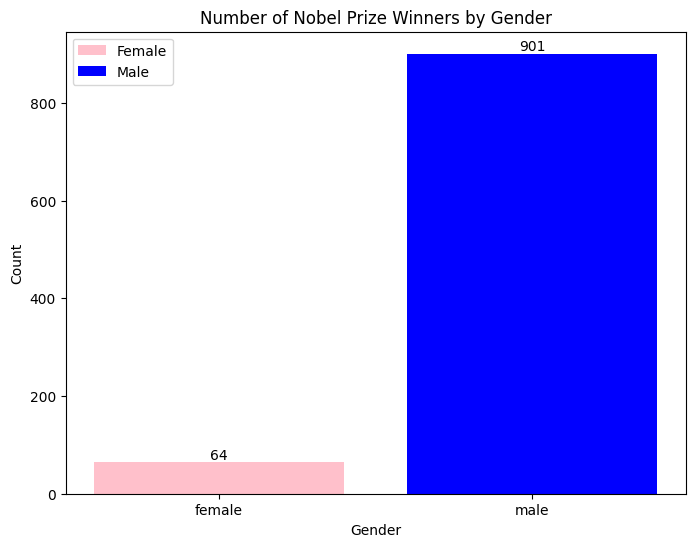

In [24]:
# Extracting data for plotting
filtered_results = [row for row in results if row[0] != 'org']
genders = [row[0] for row in filtered_results]
counts = [row[1] for row in filtered_results]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(genders, counts, color=['pink', 'blue'])  # Assigning colors for female and male

# Adding legend
plt.legend(bars, ['Female', 'Male'])

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Nobel Prize Winners by Gender')
# Adding count numbers on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom', color='black')
plt.show()

In [25]:
#2. Catergory and gender (count of male and female in each category nobel prize winners)

# Execute the SQL query
cursor.execute('''SELECT category, gender, COUNT(*) AS count
                  FROM Prizes
                  JOIN Laureates
                  ON Prizes.laureate_id1 = Laureates.id
                     OR Prizes.laureate_id2 = Laureates.id
                     OR Prizes.laureate_id3 = Laureates.id
                  WHERE gender IS NOT NULL
                  GROUP BY category, gender''')

# Fetch all rows
rows = cursor.fetchall()

# Print the result
print("Category\tGender\t\tCount")
print("-----------------------------------")
for row in rows:
    category, gender, count = row
    print(f"{category}\t{gender}\t\t{count}")



Category	Gender		Count
-----------------------------------
chemistry	female		8
chemistry	male		186
economics	female		3
economics	male		90
literature	female		17
literature	male		103
medicine	female		13
medicine	male		214
peace	female		19
peace	male		92
peace	org		30
physics	female		5
physics	male		220


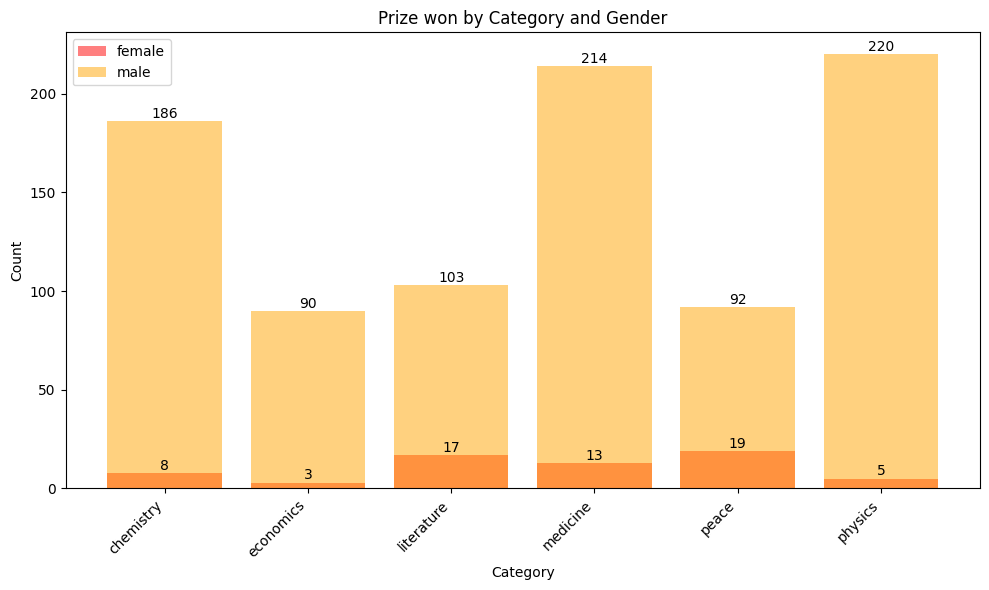

In [26]:
# Create a DataFrame from the fetched rows
df = pd.DataFrame(rows, columns=['Category', 'Gender', 'Count'])

# Filter out "org" category
df = df[df['Gender'] != 'org']

# Plotting
plt.figure(figsize=(10, 6))
colors = {'male': 'orange', 'female': 'red'}  # Define distinct colors for male and female
for gender in df['Gender'].unique():
    data = df[df['Gender'] == gender]
    plt.bar(data['Category'], 
            data['Count'], 
            label=gender, alpha=0.5, color=colors[gender])
    # Annotate bars with counts
    for i, count in enumerate(data['Count']):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Prize won by Category and Gender')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
#3. Category (count of nobel prize winners(laureates) in each category)
cursor.execute('''SELECT category, COUNT(*) AS count
                  FROM Prizes JOIN Laureates
                  ON Prizes.laureate_id1 = Laureates.id
                  OR Prizes.laureate_id2 = Laureates.id
                  OR Prizes.laureate_id3 = Laureates.id
                  GROUP BY category; ''')

# Fetch all rows
rows = cursor.fetchall()

# Print the result
print("Category\t\tCount")
print("-------------------------------")
for row in rows:
    category, count = row
    print(f"{category}\t\t{count}")


Category		Count
-------------------------------
chemistry		194
economics		93
literature		120
medicine		227
peace		141
physics		225


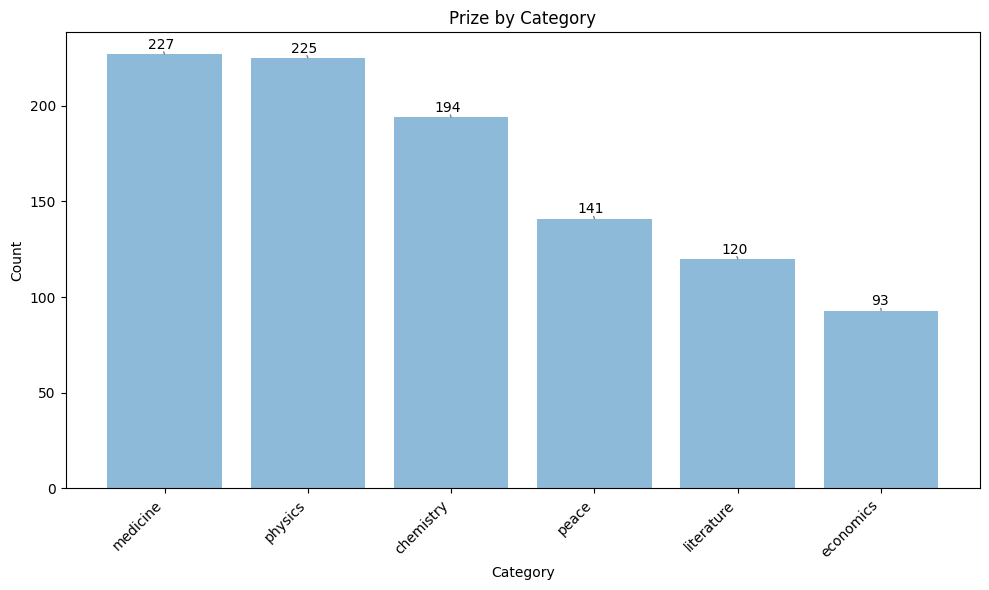

In [28]:
from adjustText import adjust_text  # Library for text labels adjustment

# Create a DataFrame from the fetched rows
df = pd.DataFrame(rows, columns=['Category', 'Count'])

# Sort DataFrame by count in descending order
df = df.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Category'], df['Count'], alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Prize by Category')

# Adding count labels on top of bars
texts = [plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom') for bar in bars]

# Adjusting text labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

plt.tight_layout()
plt.show()

In [29]:
#4. No. of Laureates who won more than one nobel prize (Count of nobel prize winners(laureates) who have won more than one nobel prize)
cursor.execute('''SELECT firstname, surname, prize_count
FROM (
    SELECT laureate_id, COUNT(*) AS prize_count
    FROM (
        SELECT laureate_id1 AS laureate_id
        FROM Prizes
        UNION ALL
        SELECT laureate_id2 AS laureate_id
        FROM Prizes
        UNION ALL
        SELECT laureate_id3 AS laureate_id
        FROM Prizes
    ) AS laureate_prizes
    GROUP BY laureate_id
    HAVING prize_count > 1
) AS multi_winners
JOIN Laureates ON multi_winners.laureate_id = Laureates.id;


''')

# Fetch all rows
rows = cursor.fetchall()

# Print the result
print("Laureates who won more than one Nobel Prize:")
print("--------------------------------------------")
for row in rows:
    firstname, surname, prize_count = row
    print(f"{firstname} {surname}: {prize_count}")

Laureates who won more than one Nobel Prize:
--------------------------------------------
Marie Curie: 2
John Bardeen: 2
Linus Pauling: 2
Frederick Sanger: 2
International Committee of the Red Cross None: 3
Office of the United Nations High Commissioner for Refugees None: 2
Barry Sharpless: 2


In [30]:
#5. Percentage of female nobel prize winners year and category
# Execute the SQL query
cursor.execute('''
SELECT CAST((Year / 10) * 10 AS INTEGER) AS decade, Category,
       AVG(CASE WHEN gender = 'female' THEN 1 ELSE 0 END) AS fproportion
FROM (
    SELECT Year, Category, gender
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id1 = Laureates.id
                   OR Prizes.laureate_id2 = Laureates.id
                   OR Prizes.laureate_id3 = Laureates.id
)
GROUP BY decade, Category;
''')

# Fetch all rows
rows = cursor.fetchall()
# Print the results with percentages
print("Decade\tCategory\tFemale Proportion (%)")
print("----------------------------------------")
for row in rows:
    decade, category, fproportion = row
    print(f"{decade}\t{category}\t{fproportion * 100:.2f}%")

Decade	Category	Female Proportion (%)
----------------------------------------
1900	chemistry	0.00%
1900	literature	10.00%
1900	medicine	0.00%
1900	peace	7.14%
1900	physics	7.69%
1910	chemistry	12.50%
1910	literature	0.00%
1910	medicine	0.00%
1910	peace	0.00%
1910	physics	0.00%
1920	chemistry	0.00%
1920	literature	20.00%
1920	medicine	0.00%
1920	peace	0.00%
1920	physics	0.00%
1930	chemistry	7.69%
1930	literature	11.11%
1930	medicine	0.00%
1930	peace	11.11%
1930	physics	0.00%
1940	chemistry	0.00%
1940	literature	16.67%
1940	medicine	7.14%
1940	peace	14.29%
1940	physics	0.00%
1950	chemistry	0.00%
1950	literature	0.00%
1950	medicine	0.00%
1950	peace	0.00%
1950	physics	0.00%
1960	chemistry	6.67%
1960	economics	0.00%
1960	literature	9.09%
1960	medicine	0.00%
1960	peace	0.00%
1960	physics	5.88%
1970	chemistry	0.00%
1970	economics	0.00%
1970	literature	0.00%
1970	medicine	4.00%
1970	peace	23.08%
1970	physics	0.00%
1980	chemistry	0.00%
1980	economics	0.00%
1980	literature	0.00%
1980	medicine	1

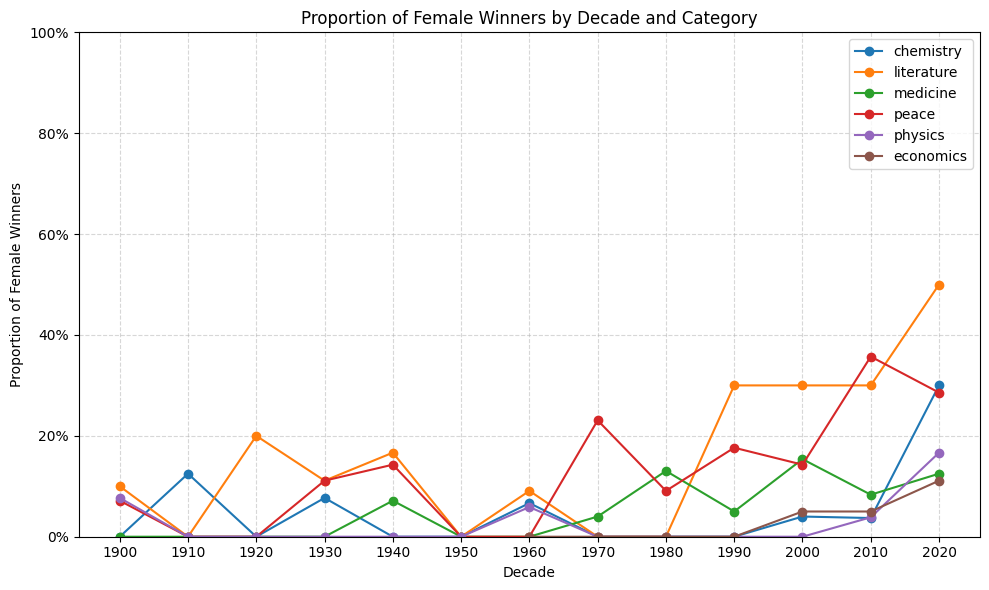

In [31]:
# Create a DataFrame from the fetched rows
df = pd.DataFrame(rows, columns=['decade', 'Category', 'fproportion'])

# Filter for only female winners
df_female = df[df['fproportion'].notnull()]

# Plotting
plt.figure(figsize=(10, 6))
for category in df_female['Category'].unique():
    data = df_female[df_female['Category'] == category]
    plt.plot(data['decade'], data['fproportion'], label=category, marker='o')
plt.xlabel('Decade')
plt.ylabel('Proportion of Female Winners')
plt.ylim(0, 1)
plt.xticks(range(1900, 2021, 10))
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.legend()
plt.title('Proportion of Female Winners by Decade and Category')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [32]:
#6. Percentage of male nobel prize winners year and category
# Execute the SQL query
cursor.execute('''
SELECT CAST((Year / 10) * 10 AS INTEGER) AS decade, Category,
       AVG(CASE WHEN gender = 'male' THEN 1 ELSE 0 END) AS mproportion
FROM (
    SELECT Year, Category, gender
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id1 = Laureates.id
                   OR Prizes.laureate_id2 = Laureates.id
                   OR Prizes.laureate_id3 = Laureates.id
)
GROUP BY decade, Category;
''')

# Fetch all rows
rows = cursor.fetchall()
# Print the results with percentages
print("Decade\tCategory\tMale Proportion (%)")
print("----------------------------------------")
for row in rows:
    decade, category, mproportion = row
    print(f"{decade}\t{category}\t{mproportion * 100:.2f}%")

Decade	Category	Male Proportion (%)
----------------------------------------
1900	chemistry	100.00%
1900	literature	90.00%
1900	medicine	100.00%
1900	peace	85.71%
1900	physics	92.31%
1910	chemistry	87.50%
1910	literature	100.00%
1910	medicine	100.00%
1910	peace	71.43%
1910	physics	100.00%
1920	chemistry	100.00%
1920	literature	80.00%
1920	medicine	100.00%
1920	peace	100.00%
1920	physics	100.00%
1930	chemistry	92.31%
1930	literature	88.89%
1930	medicine	100.00%
1930	peace	77.78%
1930	physics	100.00%
1940	chemistry	100.00%
1940	literature	83.33%
1940	medicine	92.86%
1940	peace	42.86%
1940	physics	100.00%
1950	chemistry	100.00%
1950	literature	100.00%
1950	medicine	100.00%
1950	peace	87.50%
1950	physics	100.00%
1960	chemistry	93.33%
1960	economics	100.00%
1960	literature	90.91%
1960	medicine	100.00%
1960	peace	55.56%
1960	physics	94.12%
1970	chemistry	100.00%
1970	economics	100.00%
1970	literature	100.00%
1970	medicine	96.00%
1970	peace	69.23%
1970	physics	100.00%
1980	chemistry	100.00%
1

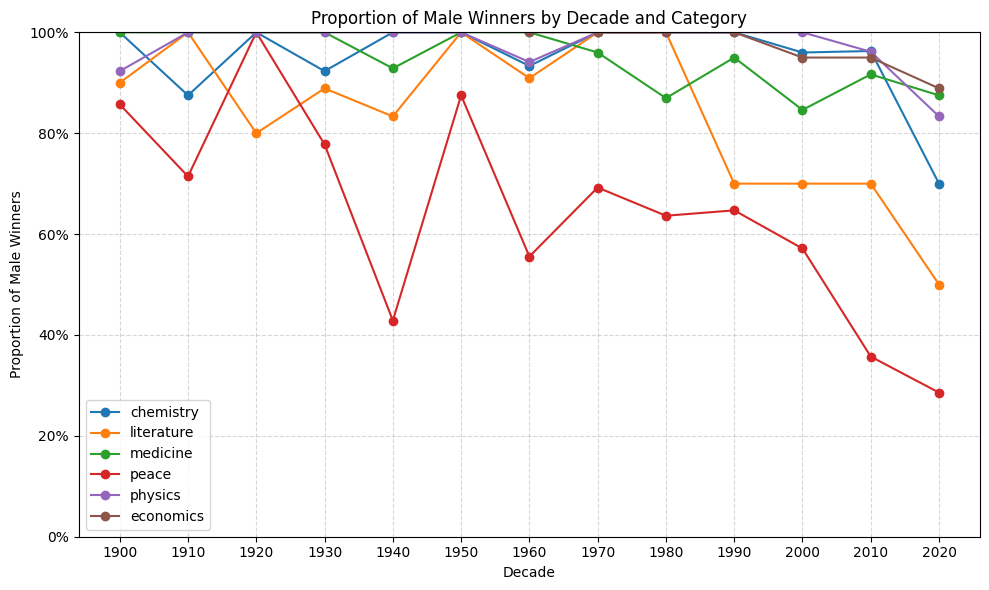

In [33]:
# Create a DataFrame from the fetched rows
df = pd.DataFrame(rows, columns=['decade', 'Category', 'mproportion'])

# Filter for only female winners
df_female = df[df['mproportion'].notnull()]

# Plotting
plt.figure(figsize=(10, 6))
for category in df_female['Category'].unique():
    data = df_female[df_female['Category'] == category]
    plt.plot(data['decade'], data['mproportion'], label=category, marker='o')
plt.xlabel('Decade')
plt.ylabel('Proportion of Male Winners')
plt.ylim(0, 1)
plt.xticks(range(1900, 2021, 10))
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.legend()
plt.title('Proportion of Male Winners by Decade and Category')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [34]:
# Add a new column Age to the Prizes table
cursor.execute('''ALTER TABLE Prizes ADD COLUMN Age_Laureate1 INTEGER''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN Age_Laureate2 INTEGER''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN Age_Laureate3 INTEGER''')

# Calculate age for each laureate and update the Age columns
cursor.execute('''UPDATE Prizes 
                  SET Age_Laureate1 = (SELECT year - strftime('%Y', born) 
                              FROM Laureates 
                              WHERE Prizes.laureate_id1 = Laureates.id),
                      Age_Laureate2 = (SELECT year - strftime('%Y', born) 
                              FROM Laureates 
                              WHERE Prizes.laureate_id2 = Laureates.id),
                      Age_Laureate3 = (SELECT year - strftime('%Y', born) 
                              FROM Laureates 
                              WHERE Prizes.laureate_id3 = Laureates.id)''')
# Execute a query to select top 5 records to verify the addition of the Age column
cursor.execute('''SELECT * FROM Prizes LIMIT 5''')

# Fetch and print the results
rows = cursor.fetchall()
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', 1029, 'male', 1030, 'male', 1031, 'male', None, None, None)
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', 1034, 'female', None, None, None, None, None, None, None)
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', 1032, 'male', None, None, None, None, 64, None, None)
(4, 2023, 'peace', 1, '"for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"', 1033, 'female', None, None, None, None, 51, None, None)
(5, 2023, 'physics', 3, '"for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter"', 1026, 'male', 1027, 'male', 1028, 'female', 82, 61, 65)


In [35]:
#7 Youngest Nobel Laureates(Age,Name,Year they won nobel prize and category)

# Execute a query to select laureates whose age is less than 32 when they won the Nobel Prize
cursor.execute('''
    SELECT Age_Laureate1 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id1 = Laureates.id
    WHERE Age_Laureate1 IS NOT NULL AND Age_Laureate1 < 32 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
    UNION
    SELECT Age_Laureate2 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id2 = Laureates.id
    WHERE Age_Laureate2 IS NOT NULL AND Age_Laureate2 < 32 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
    UNION
    SELECT Age_Laureate3 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id3 = Laureates.id
    WHERE Age_Laureate3 IS NOT NULL AND Age_Laureate3 < 32 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
''')

# Fetch and print the results
rows = cursor.fetchall()
print("Age\tFull Name\t\tYear\tCategory")
for row in rows:
    age, full_name, year, category = row
    print(f"{age}\t{full_name}\t{year}\t{category}")

Age	Full Name		Year	Category
17	Malala Yousafzai	2014	peace
25	Lawrence Bragg	1915	physics
31	Carl D. Anderson	1936	physics
31	Paul A.M. Dirac	1933	physics
31	Tsung-Dao Lee	1957	physics
31	Werner Heisenberg	1932	physics


In [36]:
#8 Oldest Nobel Laureates(Age,Name,Year they won nobel prize and category)

# Execute a query to select laureates whose age is greater than 85 when they won the Nobel Prize
cursor.execute('''
    SELECT Age_Laureate1 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id1 = Laureates.id
    WHERE Age_Laureate1 IS NOT NULL AND Age_Laureate1 > 85 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
    UNION
    SELECT Age_Laureate2 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id2 = Laureates.id
    WHERE Age_Laureate2 IS NOT NULL AND Age_Laureate2 > 85 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
    UNION
    SELECT Age_Laureate3 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id3 = Laureates.id
    WHERE Age_Laureate3 IS NOT NULL AND Age_Laureate3 > 85 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
''')

# Fetch and print the results
rows = cursor.fetchall()
print("Age\tFull Name\t\tYear\tCategory")
for row in rows:
    age, full_name, year, category = row
    print(f"{age}\t{full_name}\t{year}\t{category}")

Age	Full Name		Year	Category
86	Ferdinand Buisson	1927	peace
87	Joseph Rotblat	1995	peace
87	Karl von Frisch	1973	medicine
87	Peyton Rous	1966	medicine
87	Vitaly L. Ginzburg	2003	physics
87	Yoichiro Nambu	2008	physics
88	Doris Lessing	2007	literature
88	Raymond Davis Jr.	2002	physics
89	Lloyd S. Shapley	2012	economics
89	Roger Penrose	2020	physics
90	Klaus Hasselmann	2021	physics
90	Leonid Hurwicz	2007	economics
90	Syukuro Manabe	2021	physics
96	Arthur Ashkin	2018	physics
97	John Goodenough	2019	chemistry


In [37]:
#9 First Female Laureates(Age,Name,Year they won nobel prize and category)

# Execute a query to select the first female laureates for each category
cursor.execute('''
    SELECT MIN(p.year) AS Year,
           l.firstname || ' ' || l.surname AS Full_Name,
           p.category AS Category,
           l.bornCountry AS Birth_Country
    FROM Prizes p
    JOIN Laureates l ON (p.laureate_id1 = l.id OR p.laureate_id2 = l.id OR p.laureate_id3 = l.id)
    WHERE l.gender = 'female'
    GROUP BY p.category
    ORDER BY MIN(p.year) ASC
''')

# Fetch and print the result
rows = cursor.fetchall()
print("Year\tFull Name\tCategory\tBirth Country")
for row in rows:
    year, full_name, category, birth_country = row
    print(f"{year}\t{full_name}\t{category}\t{birth_country}")

Year	Full Name	Category	Birth Country
1903	Marie Curie	physics	Russian Empire (now Poland)
1905	Bertha von Suttner	peace	Austrian Empire (now Czech Republic)
1909	Selma Lagerlöf	literature	Sweden
1911	Marie Curie	chemistry	Russian Empire (now Poland)
1947	Gerty Cori	medicine	Austria-Hungary (now Czech Republic)
2009	Elinor Ostrom	economics	USA


In [38]:
# Add new columns for the birth country of each laureate ID to the Prizes table
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id1_bornCountry TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id2_bornCountry TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id3_bornCountry TEXT''')

# Update the born country of each laureate into the prize table
cursor.execute('''
    UPDATE Prizes
    SET laureate_id1_bornCountry = (SELECT bornCountry FROM Laureates WHERE Prizes.laureate_id1 = Laureates.id),
        laureate_id2_bornCountry = (SELECT bornCountry FROM Laureates WHERE Prizes.laureate_id2 = Laureates.id),
        laureate_id3_bornCountry = (SELECT bornCountry FROM Laureates WHERE Prizes.laureate_id3 = Laureates.id)
''')

# Execute a query to select top 5 records to verify the addition of the Age column
cursor.execute('''SELECT * FROM Prizes LIMIT 5''')

# Fetch and print the results
rows = cursor.fetchall()
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', 1029, 'male', 1030, 'male', 1031, 'male', None, None, None, 'France', 'USA', 'USSR (now Russia)')
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', 1034, 'female', None, None, None, None, None, None, None, 'USA', None, None)
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', 1032, 'male', None, None, None, None, 64, None, None, 'Norway', None, None)
(4, 2023, 'peace', 1, '"for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"', 1033, 'female', None, None, None, None, 51, None, None, 'Iran', None, None)
(5, 2023, 'physics', 3, '"for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter"', 1026, 'male', 1027, 'male', 1028, 'female', 82, 61, 65, 'French protectorate of Tunisia (now Tunisia)', 'Hungar

In [39]:
#10 Country that won most nobel prize (by birth country of laureates)

# Execute a query to find the top 10 countries that won the most Nobel Prizes by birth country of laureates
cursor.execute('''
    SELECT bornCountry AS Birth_Country,
           COUNT(*) AS Prize_Count
    FROM (
        SELECT laureate_id1_bornCountry AS bornCountry FROM Prizes WHERE laureate_id1_bornCountry IS NOT NULL
        UNION ALL
        SELECT laureate_id2_bornCountry FROM Prizes WHERE laureate_id2_bornCountry IS NOT NULL
        UNION ALL
        SELECT laureate_id3_bornCountry FROM Prizes WHERE laureate_id3_bornCountry IS NOT NULL
    ) AS All_Laureates
    GROUP BY bornCountry
    ORDER BY Prize_Count DESC
    LIMIT 10
''')

# Fetch and print the result
rows = cursor.fetchall()
if rows:
    print("Top 10 countries with the most Nobel Prizes by birth country of laureates:")
    for row in rows:
        birth_country, prize_count = row
        print(f"{birth_country}: {prize_count} prizes")

Top 10 countries with the most Nobel Prizes by birth country of laureates:
USA: 292 prizes
United Kingdom: 90 prizes
Germany: 67 prizes
France: 58 prizes
Sweden: 30 prizes
Japan: 28 prizes
Canada: 21 prizes
the Netherlands: 19 prizes
Switzerland: 19 prizes
Russia: 18 prizes


In [40]:
# Step 6: Commit the transaction and close the database connection
# conn.commit()
# conn.close()